The provided Python code is exclusively compatible with the Python Sagemath environment. It's essential to emphasize that the line $\textbf{from sage.all import *}$ functions solely within a Python environment equipped with Sagemath installation.

In [1]:
import sys
from sage.all import *
from sympy import Function, Symbol,symbols,cancel,N,sqrt,Rational
import numpy as np
from scipy.special import comb
import time
import sympy as sp
import matplotlib.pyplot as plt


In [2]:
x=Symbol('x')
t=Symbol('t')
y=Symbol('y')
f= Function('f')
# define the varaible and function

In [3]:
def split_equation1(Equation):
    if len(Equation.args)==0:
        return "This functional inequality does not belong to class (1)"
    u=0
    try:
        output=set()
        if len((Equation.expand()).operands())==1:
            output.add(Equation)
        elif len((Equation.expand()).operands()) != 1:
            for i in (Equation.expand()).operands():
                if len(i.operands())==0:
                    output.add(Equation)   
    except:
        output=set()
        if len((Equation.expand()).args)==1:
            output.add(Equation)
        elif len((Equation.expand()).args) != 1:
            for i in (Equation.expand()).args:
                if len(i.args)==0:
                    output.add(Equation)
        
    return list(output)
def split_equation2(Equation):
    try:
        terms=Equation.expand()
        termss= list(terms.operands())
        n=len(termss)
        output=[]
    except:
        terms=Equation.expand()
        termss= list(terms.args)
        n=len(termss)
        output=[]
    if n==1:
        output.append(terms)
    else:
        for i in range(n):
            output.append(termss[i].expand())
    return output
def split_equation(Equation):
    if split_equation1(Equation)== "This functional inequality does not belong to class (1)":
        return "This functional inequality does not belong to class (1)"
    if len(split_equation1(Equation))!=0:
        return split_equation1(Equation)
    else:
        return split_equation2(Equation)
def check1(split_form1):
    check=[]
    for i in split_form1:
        if i.has(f) and len(i.args)==1:
            check.append(i)
        elif i.has(f) and len(i.args) > 1:
            ur=0
            for j in i.args:
                if len(j.args)==0 and x not in i.args and y not in i.args:
                    ur = ur + 1
            if ur ==1 :
                check.append(i)
    if len(check) == len(split_form1):
        return split_form1
    else:
        return "This functional inequality does not belong to class (1)"

In [4]:
def Left_hand_side(split_form):
    L=0
    ll=set()
    for i in split_form:
        ll.add(i)
    for i in ll:
        L= L +i                                                     
    return L,0
def  Left_hand_side_coeff(Eq):
    ll=[]
    if Eq[0]==0:
        return 0
    else:
        try:
            z=0
            left=Eq[0].args
            for i in left:
                if i.coeff(x) !=0 or i.coeff(y) !=0:
                    l=[]
                    l.append(1)
                    l.append(i.coeff(x))
                    l.append(i.coeff(y))
                    ll.append(l)
                    l=[]
                elif len(i.args)==0:
                    l=[]
                    l.append(i)
                    for j in left:
                        if len(j.args) != 0:
                            for k in j.args:
                                l.append(k.coeff(x))
                                l.append(k.coeff(y))
                                ll.append(l)
                                l=[]
            for i in left:
                if len(i.args)!=0:
                    z= z +1
            if z > 1:
                for i in left:
                    if len(i.args)==1:
                        l=[]
                        l.append(1)
                        for j in i.args:
                            l.append(j.coeff(x))
                            l.append(j.coeff(y))
                            ll.append(l)
                            l=[]
                    elif len(i.args)== 2:
                        l=[]
                        for j in i.args:
                            if len(j.args) ==0:
                                l.append(j)
                        for j in i.args:
                            if len(j.args) != 0:
                                for k in j.args:
                                    l.append(k.coeff(x))
                                    l.append(k.coeff(y))
                                    ll.append(l)
                                    l=[]
                    elif len(i.args)== 3:
                        l=[]
                        co=0
                        for j in i.args:
                            if len(j.args) ==0:
                                co=co+j
                        for j in i.args:
                            if len(j.args) == 2:
                                co=co*j
                        l.append(co)
                        for j in i.args:
                            if len(j.args) == 1:
                                for k in j.args:
                                    l.append(k.coeff(x))
                                    l.append(k.coeff(y))
                                    ll.append(l)
                                    l=[]
                    
        except:
            z=0
            left=Eq[0].operands()
            for i in left:
                if i.coefficient(x) !=0 or i.coefficient(y) !=0:
                    l=[]
                    l.append(1)
                    l.append(i.coefficient(x))
                    l.append(i.coefficient(y))
                    ll.append(l)
                    l=[]

                elif len(i.operands())==0:
                    l=[]
                    l.append(i)
                    for j in left:
                        if len(j.operands()) != 0:
                            for k in j.operands():
                                l.append(k.coefficient(x))
                                l.append(k.coefficient(y))
                                ll.append(l)
                                l=[]
            for i in left:
                if len(i.operands())!=0:
                    z= z +1
            if z > 1:
                for i in left:
                    if len(i.operands())==1:
                        l=[]
                        l.append(1)
                        for j in i.operands():
                            l.append(j.coefficient(x))
                            l.append(j.coefficient(y))
                            ll.append(l)
                            l=[]
                    elif len(i.operands())== 2:
                        l=[]
                        for j in i.operands():
                            if len(j.operands()) ==0:
                                l.append(j)
                        for j in i.operands():
                            if len(j.operands()) != 0:
                                for k in j.operands():
                                    l.append(k.coefficient(x))
                                    l.append(k.coefficient(y))
                                    ll.append(l)
                                    l=[]  
                    elif len(i.operands())== 3:
                        l=[]
                        co=0
                        for j in i.operands():
                        
                            if len(j.operands()) ==0:
                                co=co+j
                        for j in i.operands():
                            if len(j.operands()) == 2:
                                co=co*j
                        l.append(co)
                        for j in i.operands():
                            if len(j.operands()) == 1:
                                for k in j.operands():
                                    l.append(k.coefficient(x))
                                    l.append(k.coefficient(y))
                                    ll.append(l)
                                    l=[]
    return ll
def sum_same_elements(input_array):
    sum_dict = {}
    # Step 1: Store the sum of last two elements and the corresponding first element in the dictionary
    for inner_array in input_array:
        key = tuple(inner_array[1:])  # Using tuple to use as dictionary key
        if key in sum_dict:
            sum_dict[key] += inner_array[0]
        else:
            sum_dict[key] = inner_array[0]
    # Step 2: Create the result array from the dictionary
    result_array = [[value, *key] for key, value in sum_dict.items()]
    return result_array

In [5]:
def general_inequality(Equation):
    start_time = time.time()
    split=split_equation(Equation)
    if split== "This functional inequality does not belong to class (1)":
        return "This functional inequality does not belong to class (1)"
    split_form=check1(split)
    if split_form== "This functional inequality does not belong to class (1)":
        return "This functional inequality does not belong to class (1)"
    Eq=Left_hand_side(split_form)
    lhh= Left_hand_side_coeff(Eq)
    lh=sum_same_elements(lhh)
    total=0
    list1=[]
    list2=[]
    nega=[]
    for row in np.array(lh):
        total=row[0]+total
    for i in range(np.array(lh).shape[0]):
        if np.array(lh)[i][0] < 0:
            nega.append(np.array(lh)[i][0])
        if np.array(lh)[i][1] < 0:
            nega.append(np.array(lh)[i][1])
        if np.array(lh)[i][2] < 0:
            nega.append(np.array(lh)[i][2])
    if len(nega)!=0:
        return "This functional inequality does not belong to class (1)"
    if round(total,1) != 1:
        return "This functional inequality does not belong to class (1)"
    else:
        for row in np.array(lh):
            list1.append(row[1]+row[2])
    for i in list1:
        if i ==1 :
            list2.append(i)
    comp=0       
    if round(total,1) ==1 and len(list1)==len(list2):
        x, y = symbols('x y')
        left = 0
        right = 0
        i = 1
        j = 2
        continue_process = True
        while continue_process:
            for item in np.array(lh):
                left = left + (item[0] * (item[1] * x + item[2] * y)**i).expand()#functional  on the left hand side
            right = right + (1/j)*cancel(((y**j - x**j) /  (y - x)))# integral on the right hand side
            if N(left,2)-N(right,2) == 0:
                i += 1
                j += 1
                continue
            else:
                continue_process = False
        # Check if the condition is false and print the result
        if not continue_process:
            comp=comp+i-1 
            exists_row = False
            for row in np.array(lh):
                if np.array_equal(row[-2:], [0, 1]):
                    exists_row = True
                    break
            if exists_row:
                print("By Step 1, every solution of the functional inequality must be a {}-concave functions.".format(i - 1))
                print()
            elif np.array(lh).shape[0]==1 and np.all(np.array(lh)[0][1:]== [1/2, 1/2]):
                print("By Step 1, every solution of the functional inequality must be a {}-concave functions.".format(i - 1))
                print()
            else:
                print("By Step 1, every solution of the functional inequality must be a {}-convex functions.".format(i - 1))
                print()
    if len(list1) != len(list2):
        return "This functional inequality does not belong to class (1)"
    elif round(total,1) ==1 and len(list1)==len(list2):
        array=np.array(lh)
        if array.shape[0]==1:
            if array[0][1]!=1:
                array = np.vstack([array, [0,1,0]])
            if array[0][2]!=1:
                array = np.vstack([array, [0,0,1]])
        if array.shape[0]==2:
            if array[0][1]!=1and array[1][1]!=1:
                array = np.vstack([array, [0,1,0]])
            if array[0][2]!=1 and array[1][2]!=1:
                array = np.vstack([array, [0,0,1]])
        if array.shape[0]>2:
            has_number_one = np.any(array[:, 1] == 1)
            has_number_t = np.any(array[:, 2] == 1)
            if not has_number_one:
                array = np.vstack((array, [0, 1, 0]))
            if not has_number_t:
                array = np.vstack((array, [0, 0, 1]))
        cdf=[]
        x_axis=[]
        for i in range(array.shape[0]):
            rl1=cancel(((array[i][1]-1)*x + array[i][2]*y)/(y-x))
            x_axis.append(str((array[i][1])*x + (array[i][2])*y))
            cdf.append(round(rl1,5))
    sorted_indices = sorted(range(len(cdf)), key=lambda k: cdf[k])
    CDF_F = [cdf[i] for i in sorted_indices]
    sorted_array = [array[i] for i in sorted_indices]
    cdq=[]
    xas=[]
    cdq1=[]
    xas1=[]
    arp=np.array(sorted_array.copy())
    cfdr=CDF_F.copy()
    xac=[]
    yarc=[]
    xad=[]
    yad=[]
    for i in range(1,arp.shape[0]):
        yarc.append(sum([arp[k][0] for k in range(i)]))
        yarc.append(sum([arp[k][0] for k in range(i)]))
        xac.append(arp[i-1][2])
        xac.append(arp[i][2])
    if len(xac)>2:
        for i in range(1,len(xac)-1):
            xad.append(xac[i])
            yad.append(yarc[i])
    xas3=[0,1]
    cdq3=[0,1]
    def mystep(x,y, ax=None, where='post', **kwargs):
        assert where in ['post', 'pre']
        x = np.array(x)
        y = np.array(y)
        if where=='post': y_slice = y[:-1]
        if where=='pre': y_slice = y[1:]
        X = np.c_[x[:-1],x[1:],x[1:]]
        Y = np.c_[y_slice, y_slice, np.zeros_like(x[:-1])*np.nan]
        if not ax: ax=plt.gca()
        return ax.plot(X.flatten(), Y.flatten(), **kwargs)
    plt.figure(figsize=(8, 6))
    mystep(xac,yarc, color="red", label='G = CDF of the left-hand side')
    plt.plot(xad, yad, color='red',linestyle='dashed')
    plt.plot(xas3,cdq3,label='F= CDF of the right hand side', color='blue')
    plt.grid()
    plt.legend(loc='upper left')
    plt.title('The cumulative distribution functions connected with the left and right hand sides of the functional inequality', fontweight='bold')
    plt.show()
    crp=0
    valu=[]
    sorted_array=np.array(sorted_array)
    for i in  range(1, len(CDF_F)):
        if round(sum([sorted_array[j][0] for j in range(i)]),5)< CDF_F[i] and\
        round(sum([sorted_array[j][0] for j in range(i +1)]),5) > CDF_F[i]:
            crp=crp+1
            valu.append(CDF_F[i])
    
    for i in  range(1, len(CDF_F)):
        if round(sum([sorted_array[j][0] for j in range(i)]),5) > CDF_F[i-1] and \
        round(sum([sorted_array[j][0] for j in range(i)]),5) < CDF_F[i] :
            crp=crp+1
            valu.append(sum([sorted_array[j][0] for j in range(i)]))
    print("From Step 2, we obtain the number of the crossing points of these functions to be ",crp,".", sep="")
    print()
    if comp==crp:
        exists_row = False
        for row in np.array(lh):
            if np.array_equal(row[-2:], [0, 1]):
                exists_row = True
                break
        if exists_row:
            print("Since the number of crossing points is equal to ", comp,\
              " then we know that the functional inequality is satisfied by every {}-concave function f.".format(comp), sep="")
            print()
        elif np.array(lh).shape[0]==1 and np.all(np.array(lh)[0][1:]== [1/2, 1/2]):
            print("Since the number of crossing point is equal to ", comp,\
              " then we know that the functional inequality is satisfied by every {}-concave function f.".format(comp), sep="")
            print()
        else:
            print("Since the number of crossing point is equal to ", comp,\
              " then we know that the functional inequality is satisfied by every {}-convex function f.".format(comp), sep="")
            print()
    elif crp < comp:
        print("The number of crossing point is less than ", comp,sep="")
        print()
    elif crp > comp:
        ab1=np.array(lh)
        tr=[]
        for i in range(ab1.shape[0]):
            tr2=cancel(((ab1[i][1]-1)*x + ab1[i][2]*y)/(y-x))
            tr.append(N(tr2,1))
        sorted_ind = sorted(range(len(tr)), key=lambda k: tr[k])
    
        sorted_arr = [ab1[i] for i in sorted_ind]
        Ab=np.array(sorted_arr.copy())
        #print(Ab)
        inte=[]
        for i in range(Ab.shape[0]):
            inte.append(sum([Ab[j][0] for j in range(i+1) ]))
        
        for i in range(comp):
            list1=[]
            for j in range(len(inte)):
                if j==0:
                    resu=sp.integrate(inte[j],(t,Ab[j][2],t))
                    list1.append(cancel(resu))
                elif j>0:
                    g=0
                    try:
                        for k in range(j):
                            resu=inte[k]
                            g=g+sp.integrate(resu,(t,Ab[k][2],Ab[k+1][2]))
                        g=g+sp.integrate(inte[j],(t,Ab[j][2],t))
                        list1.append(cancel(g))
                    except:
                        for k in range(j):
                            resu=inte[k]
                            g=g+sp.integrate(resu,(t,Ab[k][2],Ab[k+1][2]))
                        g=g+sp.integrate(inte[j],(t,Ab[j][2],t))
                        list1.append(g)
                
            inte=list1
        G_1=inte.copy()
        F_1=[]
        F_a=[]
        ff=t
        for j in range(comp):
            ff=sp.integrate(ff,(t,0,t))
        F_a.append(cancel(ff))
        for i in range(len(G_1)):
            F_1.append(F_a[0])
        n_G=[]
        n_F=[]
        for i in range(1, Ab.shape[0]):
            n_G.append(round(G_1[i-1].subs(t,Ab[i][2]),5))
            n_F.append(round(F_1[i-1].subs(t,Ab[i][2]),5))
        s_p=0
        s_n=0
        for i in (np.array(n_F)-np.array(n_G)):
            if i>=0:
                s_p=s_p +1
        for i in (np.array(n_F)-np.array(n_G)):
            if i<=0:
                s_n=s_n + 1
        if s_p != len(np.array(n_F)-np.array(n_G)) and s_n != len(np.array(n_F)-np.array(n_G)):
            print("By Step 3, the functional inequality is satisfied neither by all {}-convex function nor by all {}-concave function.".format(comp,comp), sep="")
            print()
        else:
            local_m=[]
            for i in range(len(F_1)):
                local_m.append(F_1[i]-G_1[i])
            critical_po=[]
            # Calculate the first derivative of the function
            for i in range(0,len(local_m)-1):
                derivative = sp.diff(local_m[i], t)
            # Find the critical points by solving the equation derivative = 0
                critical_points = sp.solve(derivative, t)
                real_critical_points = [point for point in critical_points if point.is_real]
                interval_critical_points = [point for point in real_critical_points if Ab[i][2] < point < Ab[i+1][2]]
                critical_po.append(interval_critical_points)
            s_np=0
            s_nn=0
            for i in range(0, len(critical_po)):
                if len(critical_po[i])==0:
                    s_np=s_np+1
                else:
                    if local_m[i].subs(t,critical_po[i][0])>=0:
                        s_np=s_np+1
            for i in range(0, len(critical_po)):
                if len(critical_po[i])==0:
                    s_nn=s_nn+1
                else:
                    if local_m[i].subs(t,critical_po[i][0])<=0:
                        s_nn=s_nn+1
            if s_p==s_np== len(critical_po) :
                exists_row = False
                for row in np.array(lh):
                    if np.array_equal(row[-2:], [0, 1]):
                        exists_row = True
                        break
                if exists_row:
                    print("By Step 3, the functional inequality is satisfied by every {}-concave function f.".format(comp), sep="")
                    print()
                elif np.array(lh).shape[0]==1 and np.all(np.array(lh)[0][1:]== [1/2, 1/2]):
                    print("By Step 3, the functional inequality is satisfied by every {}-concave function f.".format(comp), sep="")
                    print()
                else:
                    print("By Step 3, the functional inequality is satisfied by every {}-convex function f.".format(comp), sep="")
                    print()
            elif s_n==s_nn== len(critical_po) :
                exists_row = False
                for row in np.array(lh):
                    if np.array_equal(row[-2:], [0, 1]):
                        exists_row = True
                        break
                if exists_row:
                    print("By Step 3, the functional inequality is satisfied by every {}-concave function f.".format(comp), sep="")
                    print()
                elif np.array(lh).shape[0]==1 and np.all(np.array(lh)[0][1:]== [1/2, 1/2]):
                    print("By Step 3, the functional inequality is satisfied by every {}-concave function f.".format(comp), sep="")
                    print()
                else:
                    print("By Step 3, the functional inequality is satisfied by every {}-convex function f.".format(comp), sep="")
                    print()
            else:
                print("By Step 3, the functional inequality is satisfied neither by all {}-convex function nor by all {}-concave function.".format(comp,comp), sep="")
                print()

    print("- The time taken to solve the problem is %s seconds -" % round(time.time() - start_time, 2))
       

**Functional inequalities considered by M. Bessenyei and Z. Pales**

**Example 1:** see Corollary 1 in []. Suppose that $f:[x,y]\rightarrow \mathbb{R},$
<br> 
$$f\left(\tfrac{x +y}{2}\right)\leq \frac{1}{y-x}\int_x^y f(t)dt$$


By Step 1, every solution of the functional inequality must be a 1-concave functions.



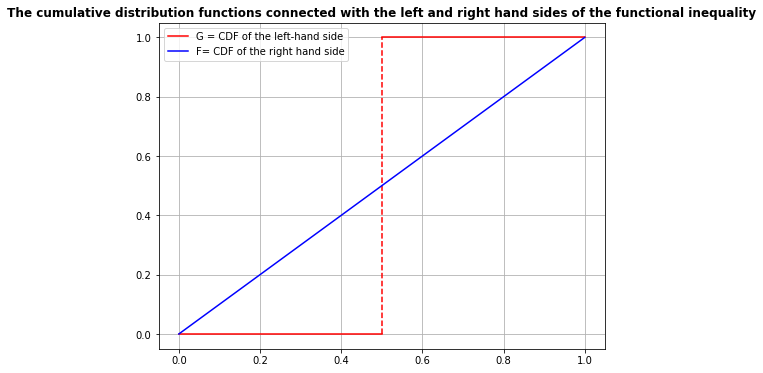

From Step 2, we obtain the number of the crossing points of these functions to be 1.

Since the number of crossing point is equal to 1 then we know that the functional inequality is satisfied by every 1-concave function f.

- The time taken to solve the problem is 0.3 seconds -


In [6]:
general_inequality(f((x+y)/2))

**Example 2:** see Corollary 2 in []. Suppose that $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\left[\tfrac{1}{4}f(x) + \tfrac{3}{4}f\left(\tfrac{1}{3}x + \tfrac{2}{3}y\right)\right]\leq \frac{1}{y-x}\int_x^y f(t)$$


By Step 1, every solution of the functional inequality must be a 2-convex functions.



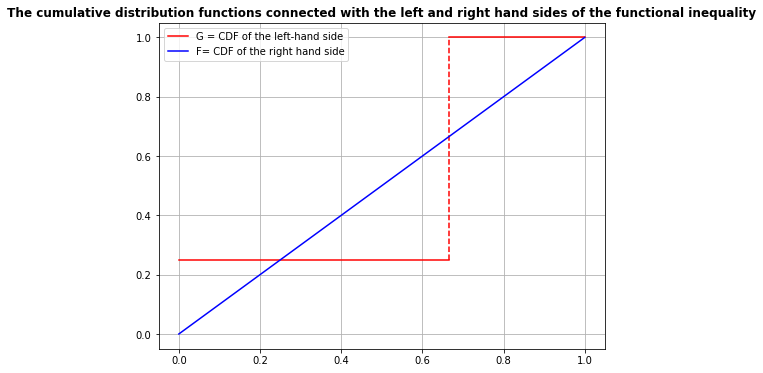

From Step 2, we obtain the number of the crossing points of these functions to be 2.

Since the number of crossing point is equal to 2 then we know that the functional inequality is satisfied by every 2-convex function f.

- The time taken to solve the problem is 0.34 seconds -


In [7]:
general_inequality((1/4)*f(x) + (3/4)*f((1/3)*x + (2/3)*y))

**Example 3:** see Corollary 3 in [].Suppose that $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\textstyle \frac{1}{2}f\left(\frac{3+\sqrt3}{6}x + \frac{3-\sqrt3}{6}y\right) + \frac{1}{2}f\left(\frac{3-\sqrt3}{6}x + \frac{3+\sqrt3}{6}y\right) \leq \frac{1}{y-x}\int_x^y f(t) dt$$


By Step 1, every solution of the functional inequality must be a 3-convex functions.



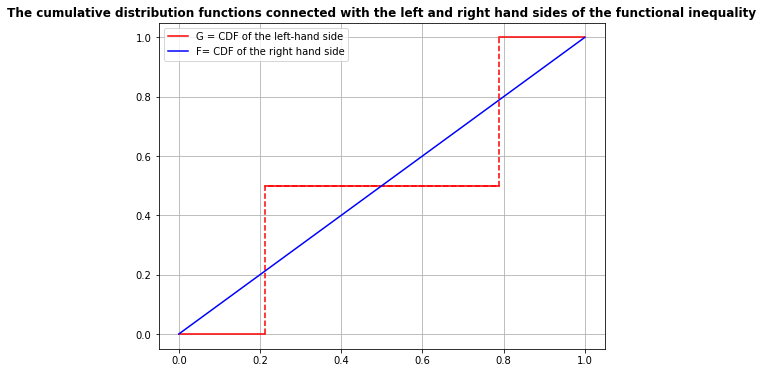

From Step 2, we obtain the number of the crossing points of these functions to be 3.

Since the number of crossing point is equal to 3 then we know that the functional inequality is satisfied by every 3-convex function f.

- The time taken to solve the problem is 0.6 seconds -


In [8]:
general_inequality((1/2)*(f(((3+sqrt(3))/6)*x + ((3-sqrt(3))/6)*y)+ f(((3-sqrt(3))/6)*x + ((3+sqrt(3))/6)*y)))

**Example 4:** see Corollary 4 in []. Suppose that $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\textstyle \frac{1}{9}f(x) + \frac{16 +\sqrt6}{36}f\left(\frac{4+\sqrt6}{10}x + \frac{6-\sqrt6}{10}y\right) + \frac{16-\sqrt6}{36}f\left(\frac{4-\sqrt6}{10}x + \frac{6+\sqrt6}{10}y\right) \leq \frac{1}{y-x}\int_x^y f(t) dt$$


By Step 1, every solution of the functional inequality must be a 4-convex functions.



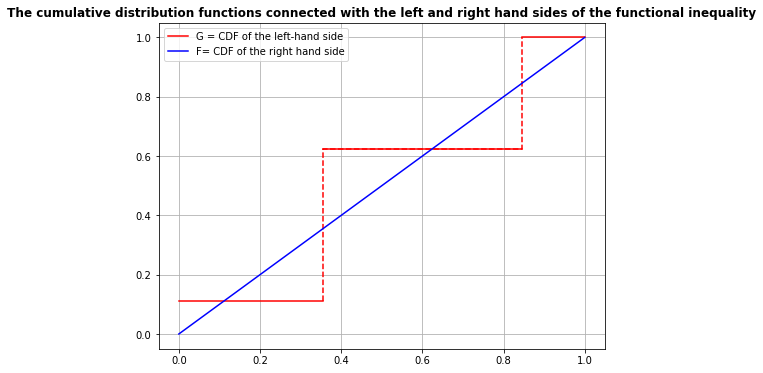

From Step 2, we obtain the number of the crossing points of these functions to be 4.

Since the number of crossing point is equal to 4 then we know that the functional inequality is satisfied by every 4-convex function f.

- The time taken to solve the problem is 0.76 seconds -


In [9]:
general_inequality((1/9)*f(x) + ((16+sqrt(6))/36)*(f(((4+sqrt(6))/10)*x + ((6-sqrt(6))/10)*y))\
                   + ((16-sqrt(6))/36)*(f(((4-sqrt(6))/10)*x + ((6+sqrt(6))/10)*y)))

**Example 5:** see Corollary 5 in []. Suppose that $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\textstyle  \frac{5}{18}f\left(\frac{5+\sqrt15}{10}x + \frac{5-\sqrt15}{10}y\right) +\frac{4}{9}f\left(\frac{x+y}{2}\right)+ \frac{5}{18}f\left(\frac{5-\sqrt15}{10}x + \frac{5+\sqrt15}{10}y\right) \leq \frac{1}{y-x}\int_x^y f(t) dt$$


By Step 1, every solution of the functional inequality must be a 5-convex functions.



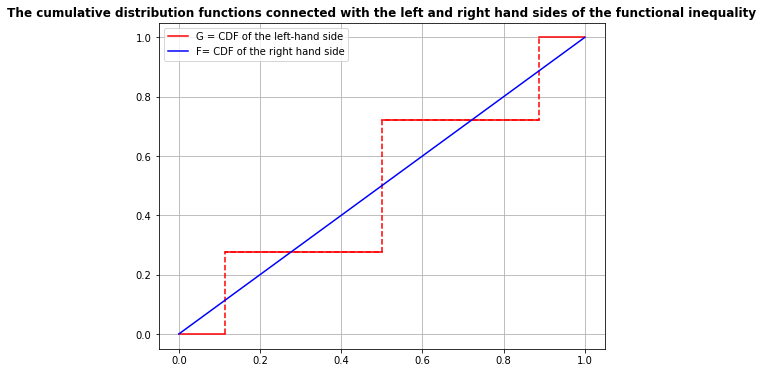

From Step 2, we obtain the number of the crossing points of these functions to be 5.

Since the number of crossing point is equal to 5 then we know that the functional inequality is satisfied by every 5-convex function f.

- The time taken to solve the problem is 0.93 seconds -


In [10]:
general_inequality((5/18)*(f(((5+sqrt(15))/10)*x + ((5-sqrt(15))/10)*y))\
                   + (4/9)*(f((x+y)/2)) + (5/18)*(f(((5-sqrt(15))/10)*x + ((5+sqrt(15))/10)*y)))

**Functional inequalities considered by T. Szostok**

**Example 6:** see Example 1 in []. Suppose that $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\textstyle \frac{3}{14}f(x) + \frac{3}{22}f\left(\frac{2}{3}x + \frac{1}{3}y\right) + \frac{50}{77}f\left(\frac{3}{10}x + \frac{7}{10}y\right) \leq \frac{1}{y-x}\int_x^y f(t) dt$$


By Step 1, every solution of the functional inequality must be a 2-convex functions.



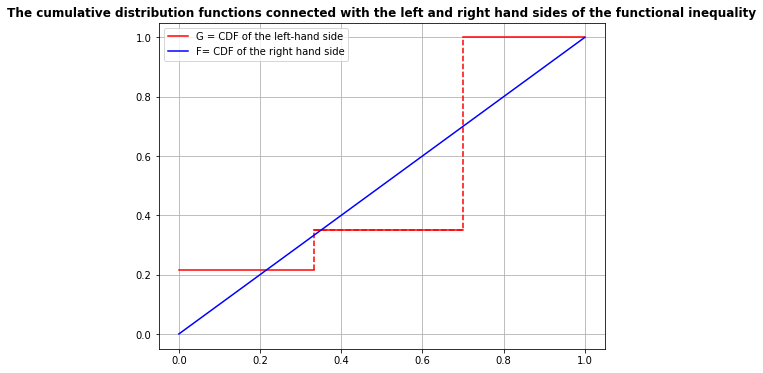

From Step 2, we obtain the number of the crossing points of these functions to be 4.

By Step 3, the functional inequality is satisfied by every 2-convex function f.

- The time taken to solve the problem is 1.63 seconds -


In [11]:
general_inequality((3/14)*f(x) + (3/22)*f((2/3)*x + (1/3)*y) 
                 + (50/77)*f((3/10)*x + (7/10)*y))

**Example 7:** see Example 2 in []. Suppose that $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\textstyle \frac{1}{5}f(x) + \frac{3}{10}f(\frac{7}{12}x + \frac{5}{12}y) + \frac{1}{2}f(\frac{1}{4}x + \frac{3}{4}y) \leq \frac{1}{y-x}\int_x^y f(t) dt$$

By Step 1, every solution of the functional inequality must be a 2-convex functions.



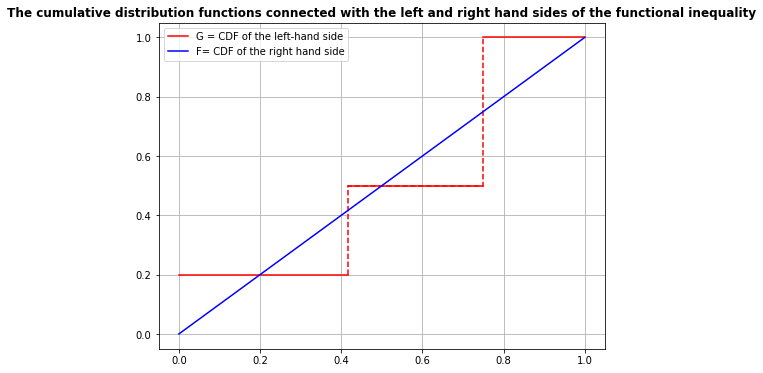

From Step 2, we obtain the number of the crossing points of these functions to be 4.

By Step 3, the functional inequality is satisfied by every 2-convex function f.

- The time taken to solve the problem is 0.62 seconds -


In [12]:
general_inequality((1/5)*f(x) + (3/10)*f((7/12)*x + (5/12)*y) 
                 + (1/2)*f((1/4)*x + (3/4)*y))

**Example 8:** see Example 3 in []. Suppose that $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\textstyle \frac{1}{9}f(x) + \frac{1}{3}f(\frac{3}{4}x + \frac{1}{4}y) + \frac{5}{9}f(\frac{1}{4}x + \frac{3}{4}y) \leq \frac{1}{y-x}\int_x^y f(t) dt$$

By Step 1, every solution of the functional inequality must be a 2-convex functions.



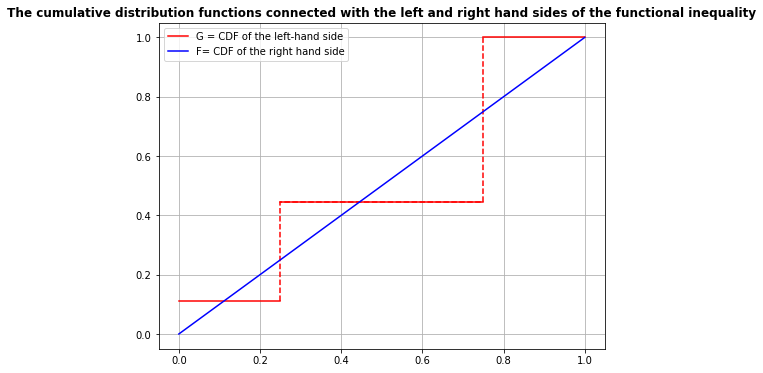

From Step 2, we obtain the number of the crossing points of these functions to be 4.

By Step 3, the functional inequality is satisfied by every 2-convex function f.

- The time taken to solve the problem is 0.55 seconds -


In [13]:
general_inequality((1/9)*f(x) + (1/3)*f((3/4)*x + (1/4)*y) 
                 + (5/9)*f((1/4)*x + (3/4)*y))

**Functional inequalities stemming from the known closed Quadrature rules**

**Example 9:** The 2-point rule is called the trapezoidal rule. Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\left[\frac{1}{2}f(x)  + \frac{1}{2}f(y)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$$

By Step 1, every solution of the functional inequality must be a 1-concave functions.



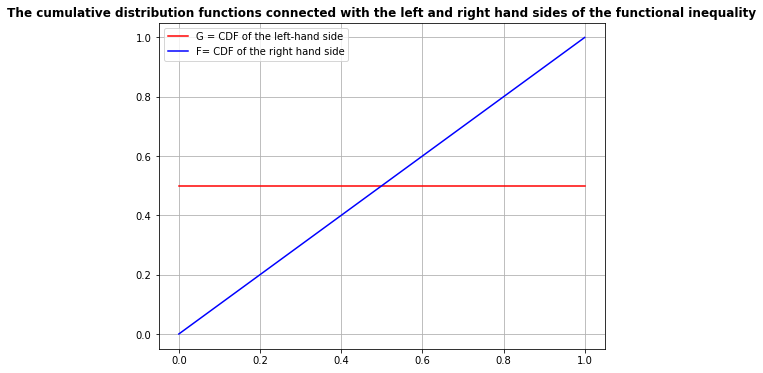

From Step 2, we obtain the number of the crossing points of these functions to be 1.

Since the number of crossing points is equal to 1 then we know that the functional inequality is satisfied by every 1-concave function f.

- The time taken to solve the problem is 0.26 seconds -


In [14]:
general_inequality((1/2)*f(x) + (1/2)*f(y))

**Example 10:** The 3-point rule is known as Simpson's rule. Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\left[\frac{1}{6}f(x) + \frac{2}{3}f\left(\frac{x+y}{2}\right) + \frac{1}{6}f(y)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$$


By Step 1, every solution of the functional inequality must be a 3-concave functions.



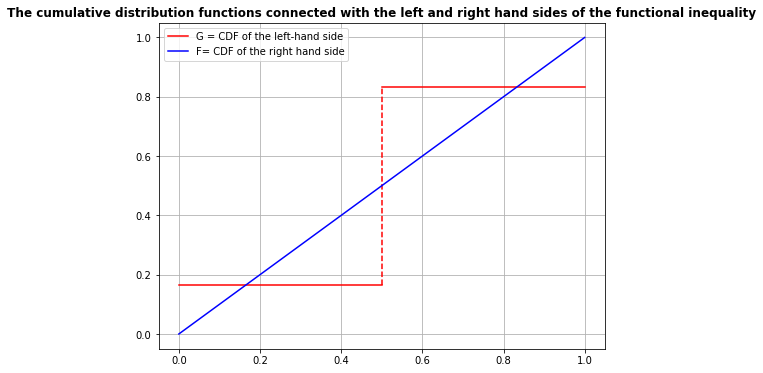

From Step 2, we obtain the number of the crossing points of these functions to be 3.

Since the number of crossing points is equal to 3 then we know that the functional inequality is satisfied by every 3-concave function f.

- The time taken to solve the problem is 0.34 seconds -


In [15]:
general_inequality((1/6)*f(x) + (2/3)*f((x+y)*(1/2)) + (1/6)*f(y))

**Example 11:** The 4-point closed rule is Simpson's 3/8 rule. Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\tfrac{1}{8}\left[f(x) + 3f\left(\tfrac{x+2y}{3}\right) + 3f\left(\tfrac{2x+y}{3}\right) +f(y)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$$


By Step 1, every solution of the functional inequality must be a 3-concave functions.



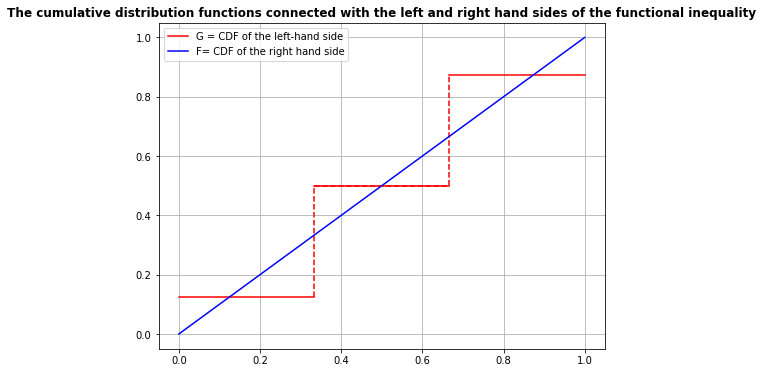

From Step 2, we obtain the number of the crossing points of these functions to be 5.

By Step 3, the functional inequality is satisfied by every 3-concave function f.

- The time taken to solve the problem is 1.24 seconds -


In [16]:
general_inequality((1/8)*(f(x) + 3*f((x+2*y)*(1/3))  + 3*f((2*x+y)*(1/3)) +f(y)))

**Example 12:** The 5-point closed rule is Boole's rule.Let $f:[x,y]\rightarrow \mathbb{R},$
$$\frac{1}{90}\left[7f(x) +32f\left(\frac{3x+y}{4}\right) + 12f\left(\frac{x+y}{2}\right) +32f\left(\frac{x+3y}{4}\right) +7f(y)\right]\leq \frac{1}{y-x}\int_x^y f(t) dt$$


By Step 1, every solution of the functional inequality must be a 5-concave functions.



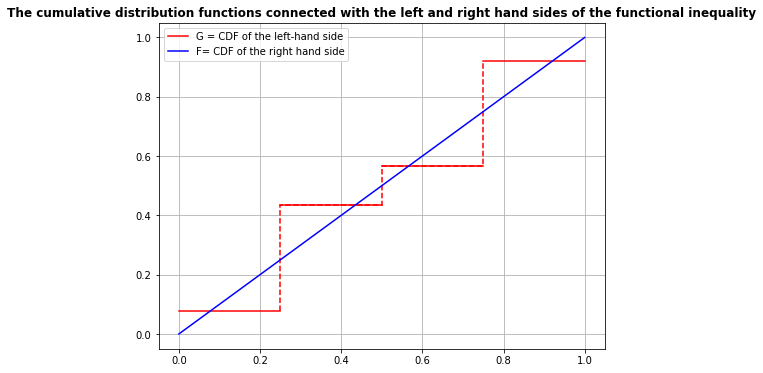

From Step 2, we obtain the number of the crossing points of these functions to be 7.

By Step 3, the functional inequality is satisfied by every 5-concave function f.

- The time taken to solve the problem is 9.81 seconds -


In [17]:
general_inequality((1/90)*(7*f(x) + 32*f((3/4)*x + (1/4)*y) + 12*f((x+y)/2) + 32*f((1/4)*x + (3/4)*y) + 7*f(y)))

**Example 13:** The 6-point closed rule. Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\frac{1}{288}\left[19f(x) +75f\left(\frac{4x+y}{5}\right) + 50f\left(\frac{3x+2y}{5}\right) +50f\left(\frac{2x+3y}{5}\right) +75f\left(\frac{x+4y}{5}\right) +19f(y)\right]\leq \frac{1}{y-x}\int_x^y f(t) dt$$


By Step 1, every solution of the functional inequality must be a 5-concave functions.



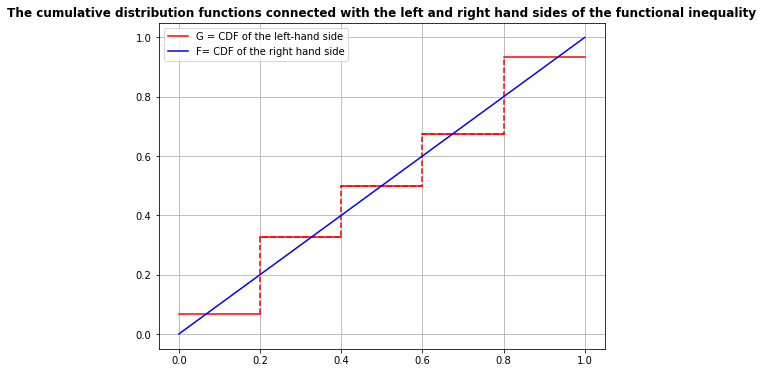

From Step 2, we obtain the number of the crossing points of these functions to be 9.

By Step 3, the functional inequality is satisfied by every 5-concave function f.

- The time taken to solve the problem is 27.46 seconds -


In [18]:
general_inequality((1/288)*(19*f(x) + 75*f((4/5)*x + (1/5)*y) + 50*f((3/5)*x +(2/5)*y)\
                            + 50*f((2/5)*x + (3/5)*y) + 75*f((1/5)*x + (4/5)*y)+ 19*f(y)))

**Example 14:** The 7-point closed rule. Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$\frac{1}{840}\left[41f(x) +216f\left(\frac{5x+y}{6}\right) + 27f\left(\frac{4x+2y}{6}\right) +272f\left(\frac{3x+3y}{6}\right)  +27f\left(\frac{2x+4y}{6}\right) +216f\left(\frac{x+5y}{6}\right)+41f(y)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$

By Step 1, every solution of the functional inequality must be a 7-concave functions.



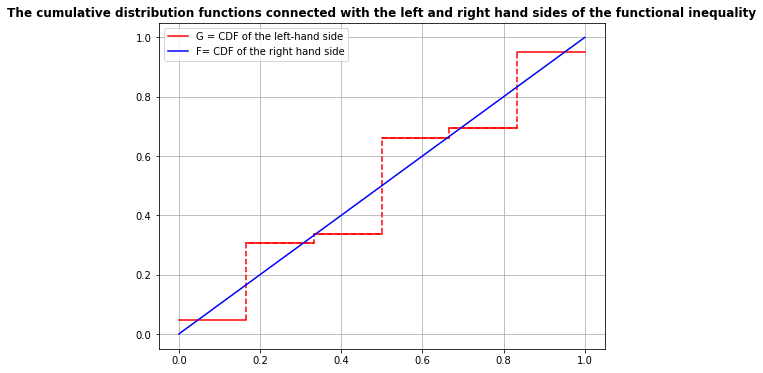

From Step 2, we obtain the number of the crossing points of these functions to be 11.

By Step 3, the functional inequality is satisfied by every 7-concave function f.

- The time taken to solve the problem is 101.16 seconds -


In [19]:
general_inequality((1/840)*(41*f(x) + 216*f((5/6)*x + (1/6)*y) + 27*f((4/6)*x + (2/6)*y) + 272*f((3/6)*x + (3/6)*y)\
                            + 27*f((2/6)*x + (4/6)*y) + 216*f((1/6)*x + (5/6)*y) + 41*f(y)))

**Example 15:** The 8-point closed rule. Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$\frac{1}{17280}\left[751f(x) +3577f\left(\frac{6x+y}{7}\right) + 1323f\left(\frac{5x+2y}{7}\right) +2989f\left(\frac{4x+3y}{7}\right)  +2989f\left(\frac{3x+4y}{7}\right) +1323f\left(\frac{2x+5y}{7}\right)+3577f\left(\frac{x+6y}{7}\right)+751f(y)\right]\\\leq \frac{1}{y-x}\int_x^y f(t)dt$

By Step 1, every solution of the functional inequality must be a 7-concave functions.



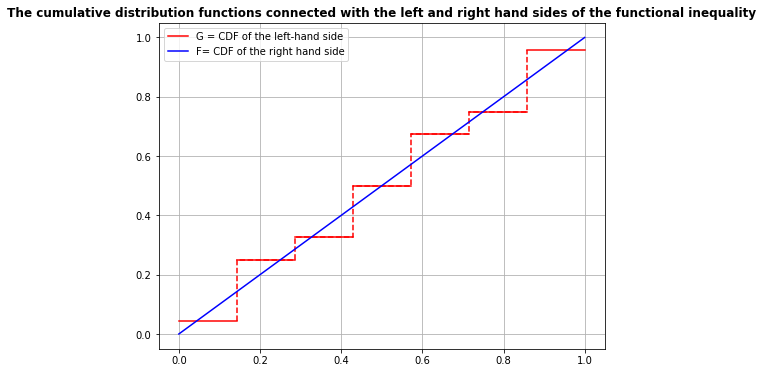

From Step 2, we obtain the number of the crossing points of these functions to be 13.

By Step 3, the functional inequality is satisfied by every 7-concave function f.

- The time taken to solve the problem is 97.65 seconds -


In [20]:
general_inequality((1/17280)*(751*f(x) + 3577*f((6/7)*x +(1/7)*y) + 1323*f((5/7)*x +(2/7)*y) + 2989*f((4/7)*x + (3/7)*y)\
                              +2989*f((3/7)*x + (4/7)*y) + 1323*f((2/7)*x +(5/7)*y) +\
                              3577*f((1/7)*x + (6/7)*y) + 751*f(y)))

**Example 16:** The 9-point closed rule. Let $f:[x,y]\rightarrow \mathbb{R},$ 
<br>
$\frac{1}{28350}\left[989f(x) +5888f\left(\frac{7x+y}{8}\right) - 928f\left(\frac{6x+2y}{8}\right) +10496f\left(\frac{5x+3y}{8}\right) -4540f\left(\frac{4x+4y}{8}\right) +10496f\left(\frac{3x+5y}{8}\right)-928f\left(\frac{2x+6y}{8}\right)+5888f\left(\frac{x+7y}{8}\right)+989f(y)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$

In [21]:
general_inequality((1/28350)*(989*f(x) + 5888*f((7/8)*x + (1/8)*y) -928*f((6/8)*x + (2/8)*y) +\
                              10496*f((5/8)*x + (3/8)*y) -4540*f((4/8)*x +(4/8)*y)\
                              + 10496*f((3/8)*x + (5/8)*y) -928*f((2/8)*x + (6/8)*y) +\
                              5888*f((1/8)*x+ (7/8)*y) + 989*f(y)))

'This functional inequality does not belong to class (1)'

**Example 17:** The 10-point closed rule. Let $f:[x,y]\rightarrow \mathbb{R},$ 
<br>
$\frac{1}{89600}\left[2857(f(x)+f(y)) + 15741\left(f\left(\frac{8x+y}{9}\right) +f\left(\frac{x+8y}{9}\right)\right) +1080\left(f\left(\frac{7x+2y}{9}\right) +f\left(\frac{2x+7y}{9}\right)\right) +19344\left(f\left(\frac{6x+3y}{9}\right)+f\left(\frac{3x+6y}{9}\right)\right)+5778\left(f\left(\frac{5x+4y}{9}\right)+f\left(\frac{4x+5y}{9}\right)\right)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$

By Step 1, every solution of the functional inequality must be a 9-concave functions.



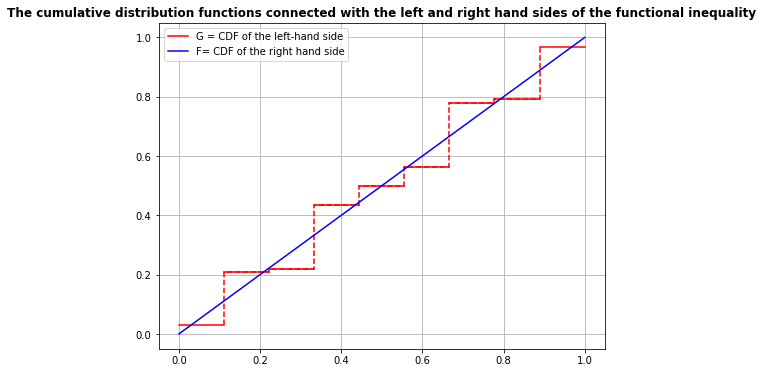

From Step 2, we obtain the number of the crossing points of these functions to be 13.

By Step 3, the functional inequality is satisfied by every 9-concave function f.

- The time taken to solve the problem is 360.66 seconds -


In [22]:
general_inequality((1/89600)*(2857*(f(x)+f(y)) + 15741*(f((8/9)*x +(1/9)*y) + f((1/9)*x +(8/9)*y))+ \
                              1080*(f((7/9)*x +(2/9)*y)+ f((2/9)*x+(7/9)*y))+\
                              19344*(f((6/9)*x + (3/9)*y) + f((3/9)*x + (6/9)*y))\
                              + 5778*(f((5/9)*x + (4/9)*y) + f((4/9)*x + (5/9)*y))))

**Example 18:** The 11-point closed rule. Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$\frac{1}{598752}\left[16067(f(x)+f(y)) + 106300\left(f\left(\frac{9x+y}{10}\right) +f\left(\frac{x+9y}{10}\right)\right) -48525\left(f\left(\frac{8x+2y}{10}\right) +f\left(\frac{2x+8y}{10}\right)\right) +272400\left(f\left(\frac{7x+3y}{10}\right)+f\left(\frac{3x+7y}{10}\right)\right)-260550\left(f\left(\frac{6x+4y}{10}\right)+f\left(\frac{4x+6y}{10}\right)\right)+427368f\left(\frac{5x+5y}{10}\right)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$

In [23]:
general_inequality((1/598752)*(16067*(f(x)+f(y)) + 106300*(f((9/10)* x + (1/10)*y) + f((1/10)*x +(9/10)*y))-\
                               48525*(f((8/10)* x + (2/10)*y) + f((2/10)*x +(8/10)*y)) + \
                               272400*(f((7/10)* x + (3/10)*y) + f((3/10)*x +(7/10)*y))\
                               -260550*(f((6/10)* x + (4/10)*y) + f((4/10)*x +(6/10)*y))\
                               + 427368*f((5/10)*x + (5/10)*y)))

'This functional inequality does not belong to class (1)'

**Functional inequalities stemming from the known open Newton-Cotes rules**

**Example 19:** The 2-point rule. Let $f:[x,y]\rightarrow \mathbb{R},$

<br>
$$\frac{1}{2}f\left(\frac{2}{3}x + \frac{1}{3}y\right) +\frac{1}{2}f\left(\frac{1}{3}x +\frac{2}{3}y\right)\leq \frac{1}{y-x}\int_x^y f(t)dt$$


By Step 1, every solution of the functional inequality must be a 1-convex functions.



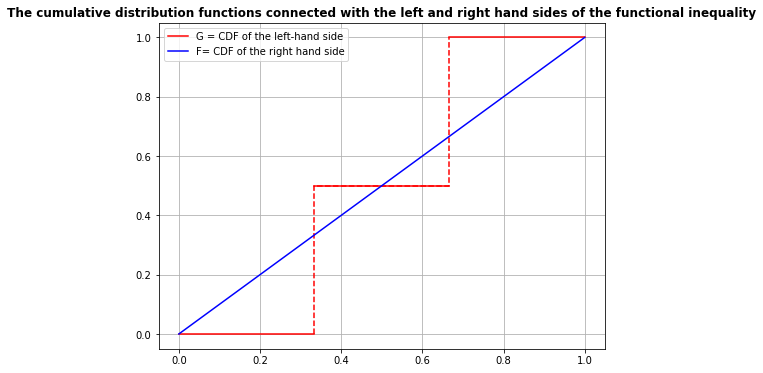

From Step 2, we obtain the number of the crossing points of these functions to be 3.

By Step 3, the functional inequality is satisfied by every 1-convex function f.

- The time taken to solve the problem is 0.46 seconds -


In [24]:
general_inequality((1/2)*f((2/3)*x + (1/3)*y)+  (1/2)*f((1/3)*x +(2/3)*y))

**Example 20:** The 3-point rule. Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\frac{1}{3}\left[2f\left(\frac{3}{4}x + \frac{1}{4}y\right)-f\left(\frac{2}{4}x +\frac{2}{4}y\right) +2f\left(\frac{1}{4}x +\frac{3}{4}y\right)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$$


In [25]:
general_inequality((1/3)*(2*f((3/4)*x+ (1/4)*y) - f((2/4)*x + (2/4)*y) + 2*f((1/4)*x + (3/4)*y)))

'This functional inequality does not belong to class (1)'

**Example 21:** The 4-point rule. Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\frac{1}{24}\left[11f\left(\frac{4}{5}x + \frac{1}{5}y\right)+f\left(\frac{3}{5}x +\frac{2}{5}y\right) +f\left(\frac{2}{5}x +\frac{3}{5}y\right) +11f\left(\frac{1}{5}x +\frac{4}{5}y\right)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$$


By Step 1, every solution of the functional inequality must be a 3-convex functions.



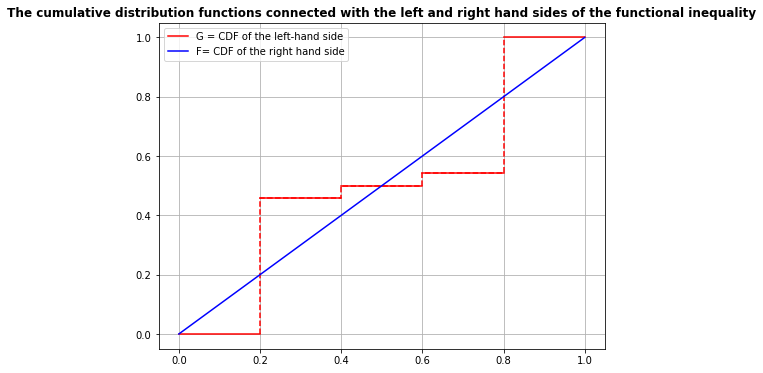

From Step 2, we obtain the number of the crossing points of these functions to be 3.

Since the number of crossing point is equal to 3 then we know that the functional inequality is satisfied by every 3-convex function f.

- The time taken to solve the problem is 0.5 seconds -


In [26]:
general_inequality((1/24)*(11*f((4/5)*x +(1/5)*y) + f((3/5)*x \
                                                      + (2/5)*y) + f((2/5)*x + (3/5)*y) + 11*f((1/5)*x + (4/5)*y)))

**Example 22:** The 5-point rule. Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\frac{1}{20}\left[11f\left(\frac{5}{6}x + \frac{1}{6}y\right)-14f\left(\frac{4}{6}x +\frac{2}{6}y\right) +26f\left(\frac{3}{6}x +\frac{3}{6}y\right) -14f\left(\frac{2}{6}x +\frac{4}{6}y\right)+11f\left(\frac{1}{6}x +\frac{5}{6}y\right)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$$


In [27]:
general_inequality((1/20)*(11*f((5/6)*x + (1/6)*y) -14*f((4/6)*x + (2/6)*y) + 26*f((3/6)*x + (3/6)*y) -\
                           14*f((2/6)*x + (4/6)*y) + 11*f((1/6)*x + (5/6)*y)))

'This functional inequality does not belong to class (1)'

**Example 23:** The 6-point rule. Let $f:[x,y]\rightarrow \mathbb{R},$
<br> 
<br>
$\frac{1}{1440}\left[611f\left(\frac{6}{7}x + \frac{1}{7}y\right)-453f\left(\frac{5}{7}x +\frac{2}{7}y\right) +562f\left(\frac{4}{7}x +\frac{3}{7}y\right) +562f\left(\frac{3}{7}x +\frac{4}{7}y\right)-453f\left(\frac{2}{7}x +\frac{5}{7}y\right)+611f\left(\frac{1}{7}x + \frac{6}{7}y\right)\right] \leq \frac{1}{y-x}\int_x^y f(t)dt$


In [28]:
general_inequality((1/1440)*(611*f((6/7)*x + (1/7)*y) -453*f((5/7)*x +(2/7)*y) + 562*f((4/7)*x + (3/7)*y) + \
                             562*f((3/7)*x+(4/7)*y)-\
                             453*f((2/7)*x + (5/7)*y) + 611*f((1/7)*x +(6/7)*y)))

'This functional inequality does not belong to class (1)'

**Example 24:** The 7-point rule. Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$\frac{1}{945}\left[460f\left(\frac{7}{8}x + \frac{1}{8}y\right)-954f\left(\frac{6}{8}x +\frac{2}{8}y\right) +2196f\left(\frac{5}{8}x +\frac{3}{8}y\right)-2459f\left(\frac{4}{8}x +\frac{4}{8}y\right)+2196f\left(\frac{3}{8}x +\frac{5}{8}y\right)-954f\left(\frac{2}{8}x + \frac{6}{8}y\right)+460f\left(\frac{1}{8}x + \frac{7}{8}y\right)\right] \leq \frac{1}{y-x}\int_x^y f(t)dt$

In [29]:
general_inequality((1/945)*(460*f((7/8)*x + (1/8)*y) -954*f((6/8)*x +(2/8)*y) + 2196*f((5/8)*x + (3/8)*y) \
                            - 2459*f((4/8)*x + (4/8)*y)\
                            +2196*f((3/8)*x + (5/8)*y) -954*f((2/8)*x + (6/8)*y) + 460*f((1/8)*x + (7/8)*y)))

'This functional inequality does not belong to class (1)'

**Example 25:** Weddle's rule. Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$\frac{1}{20}\left[f(x)+ 5f\left(\frac{5}{6}x + \frac{1}{6}y\right)+f\left(\frac{4}{6}x +\frac{2}{6}y\right) +6f\left(\frac{3}{6}x +\frac{3}{6}y\right)+f\left(\frac{2}{6}x +\frac{4}{6}y\right)+5f\left(\frac{1}{6}x +\frac{5}{6}y\right)+ f(y)\right] \leq \frac{1}{y-x}\int_x^y f(t)dt$

By Step 1, every solution of the functional inequality must be a 5-concave functions.



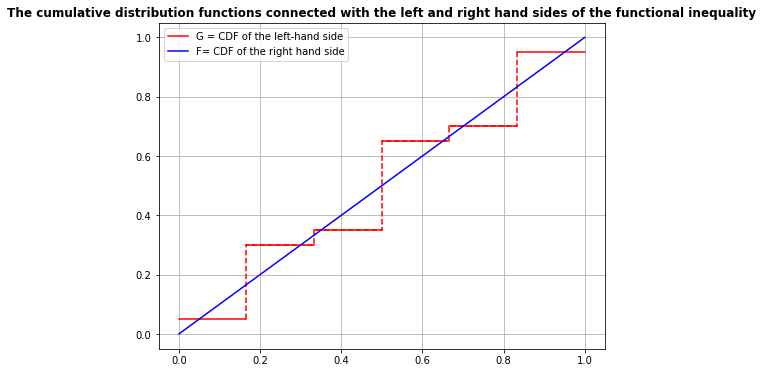

From Step 2, we obtain the number of the crossing points of these functions to be 11.

By Step 3, the functional inequality is satisfied by every 5-concave function f.

- The time taken to solve the problem is 24.17 seconds -


In [30]:
general_inequality((1/20)*(f(x) + 5*f((5/6)*x + (1/6)*y) + f((4/6)*x + (2/6)*y) +\
                           6*f((3/6)*x + (3/6)*y) + f((2/6)*x + (4/6)*y)+ 5*f((1/6)*x+(5/6)*y) + f(y)))

**Example 20:**  Hardy's rule. Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$\frac{1}{600}\left[28f(x)+ 162f\left(\frac{5}{6}x + \frac{1}{6}y\right)+220f\left(\frac{3}{6}x +\frac{3}{6}y\right) +162f\left(\frac{1}{6}x +\frac{5}{6}y\right)+ 28f(y)\right] \leq \frac{1}{y-x}\int_x^y f(t)dt$

By Step 1, every solution of the functional inequality must be a 5-concave functions.



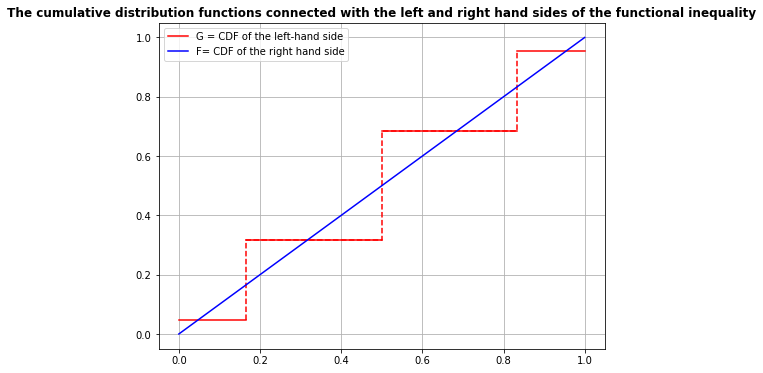

From Step 2, we obtain the number of the crossing points of these functions to be 7.

By Step 3, the functional inequality is satisfied by every 5-concave function f.

- The time taken to solve the problem is 17.11 seconds -


In [31]:
general_inequality((1/600)*(28*f(x) + 162*f((5/6)*x + (1/6)*y) + 220*f((3/6)*x + (3/6)*y) \
                            + 162*f((1/6)*x + (5/6)*y) + 28*f(y)))

**Example 27:**  A 3-point extended rule for odd n. Applying Simpson's 3/8 rule and Simpson's rule (3-point) twice, and adding gives.Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$\frac{1}{10}\left[\frac{3}{8}f(x)+ \frac{9}{8}f\left(\frac{9}{10}x + \frac{1}{10}y\right)+\frac{9}{8}f\left(\frac{8}{10}x + \frac{2}{10}y\right)+ \frac{17}{24}f\left(\frac{7}{10}x + \frac{3}{10}y\right)+\frac{4}{3}f\left(\frac{6}{10}x + \frac{4}{10}y\right)+\frac{2}{3}f\left(\frac{5}{10}x + \frac{5}{10}y\right)+\frac{4}{3}f\left(\frac{4}{10}x + \frac{6}{10}y\right)+\frac{17}{24}f\left(\frac{3}{10}x + \frac{7}{10}y\right)+\frac{9}{8}f\left(\frac{2}{10}x + \frac{8}{10}y\right)+\frac{9}{8}f\left(\frac{1}{10}x + \frac{9}{10}y\right)+\frac{3}{8}f(y)\right] \leq \frac{1}{y-x}\int_x^y f(t)dt$

By Step 1, every solution of the functional inequality must be a 3-concave functions.



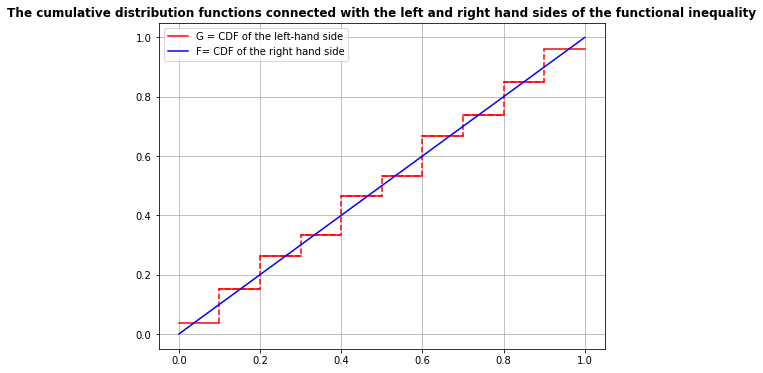

From Step 2, we obtain the number of the crossing points of these functions to be 19.

By Step 3, the functional inequality is satisfied by every 3-concave function f.

- The time taken to solve the problem is 6.58 seconds -


In [32]:
general_inequality((1/10)*((3/8)*f(x) + (9/8)*f((9/10)*x + (1/10)*y) + (9/8)*f((8/10)*x+(2/10)*y)
                           + (17/24)*f((7/10)*x+(3/10)*y)+(4/3)*f((6/10)*x+(4/10)*y)\
                           +(2/3)*f((5/10)*x+(5/10)*y)+ (4/3)*f((4/10)*x + (6/10)*y)+(17/24)*f((3/10)*x+(7/10)*y)+\
                           (9/8)*f((2/10)*x+(8/10)*y) + (9/8)*f((1/10)*x+(9/10)*y) +(3/8)*f(y)))

**Higher-order convex function of Hermite-Hadamard inequalities with negative results**

**Example 28:** Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\left[\frac{1}{18}f(x) + \frac{21}{34}f\left(\frac{2x+y}{3}\right) + \frac{50}{153}f\left(\frac{x+9y}{10}\right)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$$

By Step 1, every solution of the functional inequality must be a 2-convex functions.



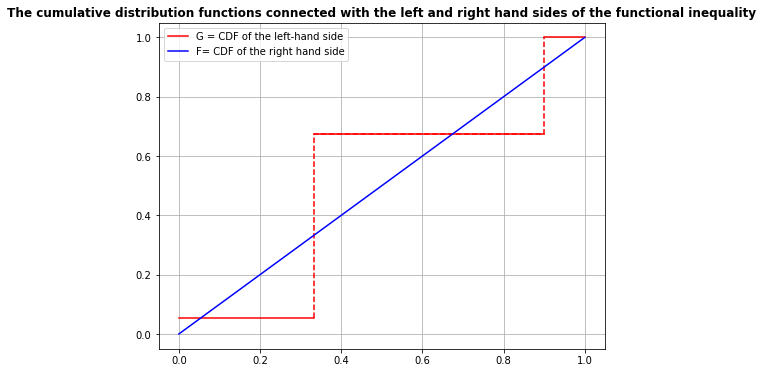

From Step 2, we obtain the number of the crossing points of these functions to be 4.

By Step 3, the functional inequality is satisfied neither by all 2-convex function nor by all 2-concave function.

- The time taken to solve the problem is 0.73 seconds -


In [33]:
general_inequality((1/18)*f(x) + (21/34)*f((2*x+y)/3) + (50/153)*f((x+9*y)/10))

**Example 29:** Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\left[\frac{1}{15}f(x) + \frac{24}{65}f\left(\frac{19x+5y}{24}\right) + \frac{22}{39}f\left(\frac{x+3y}{4}\right)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$$

By Step 1, every solution of the functional inequality must be a 2-convex functions.



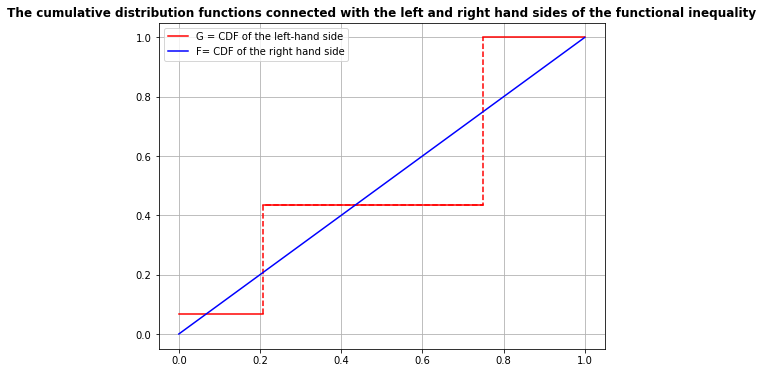

From Step 2, we obtain the number of the crossing points of these functions to be 4.

By Step 3, the functional inequality is satisfied neither by all 2-convex function nor by all 2-concave function.

- The time taken to solve the problem is 0.49 seconds -


In [34]:
general_inequality((1/15)*f(x) + (24/65)*f((19*x+5*y)/24) + (22/39)*f((x+3*y)/4))

**Example 30:** Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\left[\frac{1}{30}f(x) + \frac{243}{610}f\left(\frac{22x+5y}{27}\right) + \frac{104}{183}f\left(\frac{x+3y}{4}\right)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$$

By Step 1, every solution of the functional inequality must be a 2-convex functions.



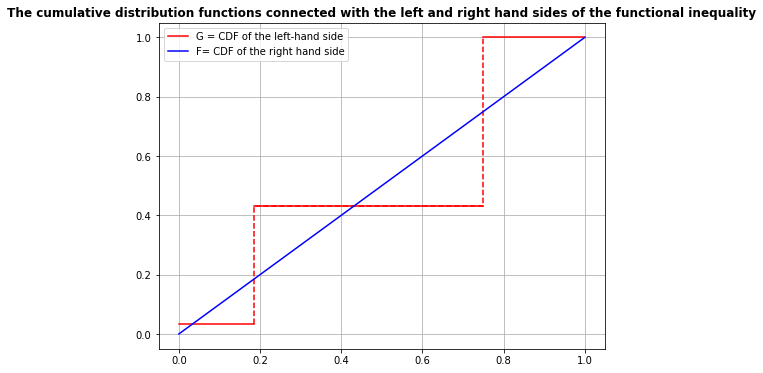

From Step 2, we obtain the number of the crossing points of these functions to be 4.

By Step 3, the functional inequality is satisfied neither by all 2-convex function nor by all 2-concave function.

- The time taken to solve the problem is 0.54 seconds -


In [35]:
general_inequality((1/30)*f(x) + (243/610)*f((22/27)*x + (5/27)*y) + (104/183)*f((1/4)*x + (3/4)*y))

**Example 31:** Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\left[\frac{1}{45}f(x) + \frac{49}{120}f\left(\frac{23x+5y}{28}\right) + \frac{41}{72}f\left(\frac{x+3y}{4}\right)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$$

By Step 1, every solution of the functional inequality must be a 2-convex functions.



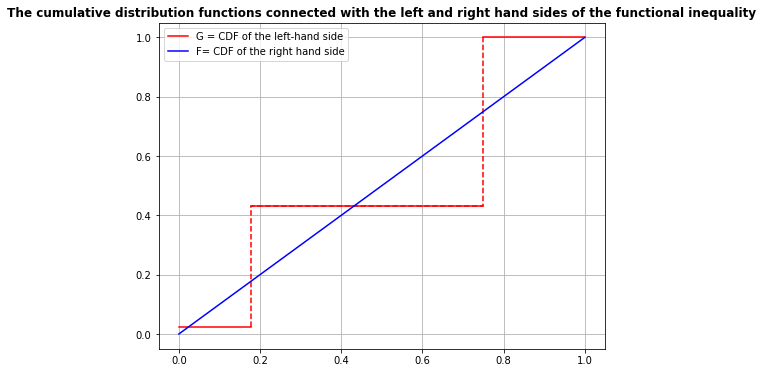

From Step 2, we obtain the number of the crossing points of these functions to be 4.

By Step 3, the functional inequality is satisfied neither by all 2-convex function nor by all 2-concave function.

- The time taken to solve the problem is 0.52 seconds -


In [36]:
general_inequality((1/45)*f(x) + (49/120)*f((23/28)*x + (5/28)*y) + (41/72)*f((1/4)*x + (3/4)*y))

**Example 32:** Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\left[\frac{1}{90}f(x) + \frac{841}{2010}f\left(\frac{24x+5y}{29}\right) + \frac{344}{603}f\left(\frac{x+3y}{4}\right)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$$

By Step 1, every solution of the functional inequality must be a 2-convex functions.



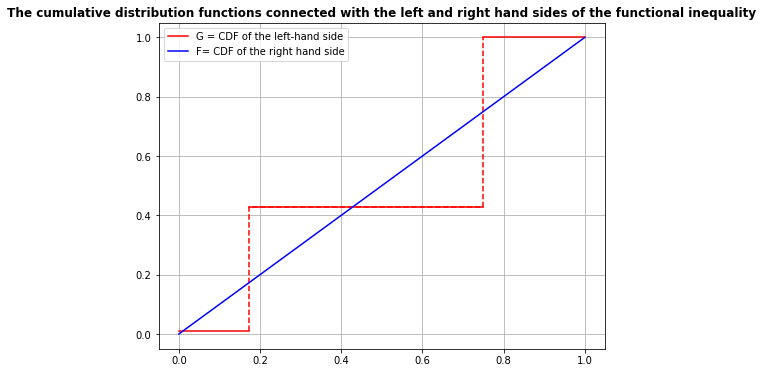

From Step 2, we obtain the number of the crossing points of these functions to be 4.

By Step 3, the functional inequality is satisfied neither by all 2-convex function nor by all 2-concave function.

- The time taken to solve the problem is 0.54 seconds -


In [37]:
general_inequality((1/90)*f(x) + (841/2010)*f((24/29)*x + (5/29)*y) + (344/603)*f((1/4)*x + (3/4)*y))

**Example 33:** Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\left[\frac{7}{108}f(x) + \frac{841}{2268}f\left(\frac{23x+6y}{29}\right) + \frac{320}{567}f\left(\frac{x+3y}{4}\right)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$$

By Step 1, every solution of the functional inequality must be a 2-convex functions.



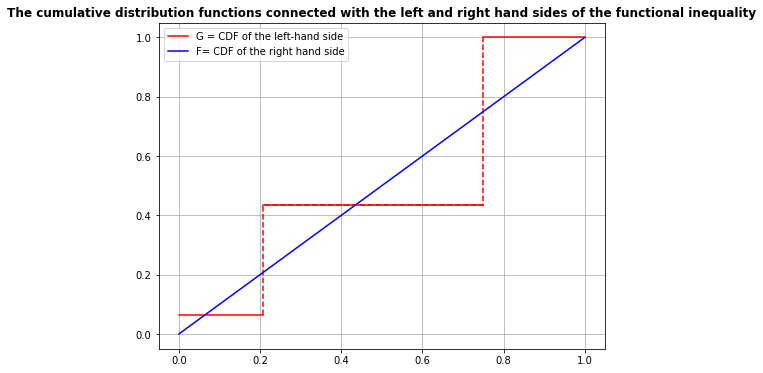

From Step 2, we obtain the number of the crossing points of these functions to be 4.

By Step 3, the functional inequality is satisfied neither by all 2-convex function nor by all 2-concave function.

- The time taken to solve the problem is 0.55 seconds -


In [38]:
general_inequality((7/108)*f(x) + (841/2268)*f((23/29)*x + (6/29)*y) + (320/567)*f((1/4)*x + (3/4)*y))

**Example 34:** Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\left[\frac{5}{108}f(x) + \frac{961}{2484}f\left(\frac{25x+6y}{31}\right) + \frac{352}{621}f\left(\frac{x+3y}{4}\right)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$$

By Step 1, every solution of the functional inequality must be a 2-convex functions.



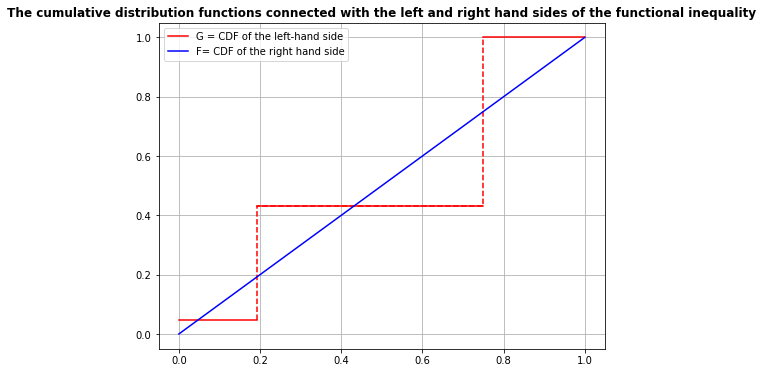

From Step 2, we obtain the number of the crossing points of these functions to be 4.

By Step 3, the functional inequality is satisfied neither by all 2-convex function nor by all 2-concave function.

- The time taken to solve the problem is 0.52 seconds -


In [39]:
general_inequality((5/108)*f(x) + (961/2484)*f((25/31)*x + (6/31)*y) + (352/621)*f((1/4)*x + (3/4)*y))

**Example 35:** Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\left[\frac{13}{216}f(x) + \frac{3481}{9288}f\left(\frac{47x+12y}{59}\right) + \frac{656}{1161}f\left(\frac{x+3y}{4}\right)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$$

By Step 1, every solution of the functional inequality must be a 2-convex functions.



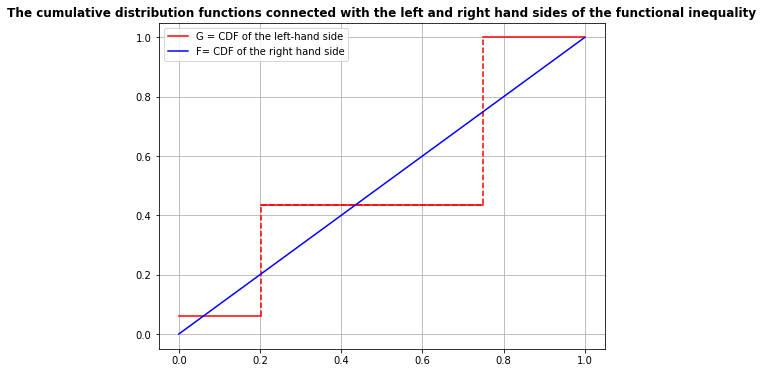

From Step 2, we obtain the number of the crossing points of these functions to be 4.

By Step 3, the functional inequality is satisfied neither by all 2-convex function nor by all 2-concave function.

- The time taken to solve the problem is 0.5 seconds -


In [40]:
general_inequality((13/216)*f(x) + (3481/9288)*f((47/59)*x + (12/59)*y) + (656/1161)*f((1/4)*x + (3/4)*y))

**Example 36:** Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\left[\frac{29}{414}f(x) + \frac{11881}{32430}f\left(\frac{86x+23y}{109}\right) + \frac{1192}{2115}f\left(\frac{x+3y}{4}\right)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$$

By Step 1, every solution of the functional inequality must be a 2-convex functions.



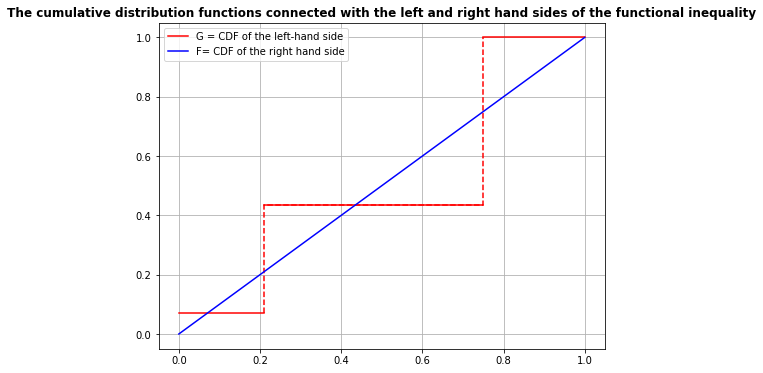

From Step 2, we obtain the number of the crossing points of these functions to be 4.

By Step 3, the functional inequality is satisfied neither by all 2-convex function nor by all 2-concave function.

- The time taken to solve the problem is 0.48 seconds -


In [41]:
general_inequality((29/414)*f(x) + (11881/32430)*f((86/109)*x + (23/109)*y) + (1192/2115)*f((1/4)*x + (3/4)*y))

**Example 37:** Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\left[\frac{3}{46}f(x) + \frac{4107}{11086}f\left(\frac{88x+23y}{111}\right) + \frac{136}{241}f\left(\frac{x+3y}{4}\right)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$$

By Step 1, every solution of the functional inequality must be a 2-convex functions.



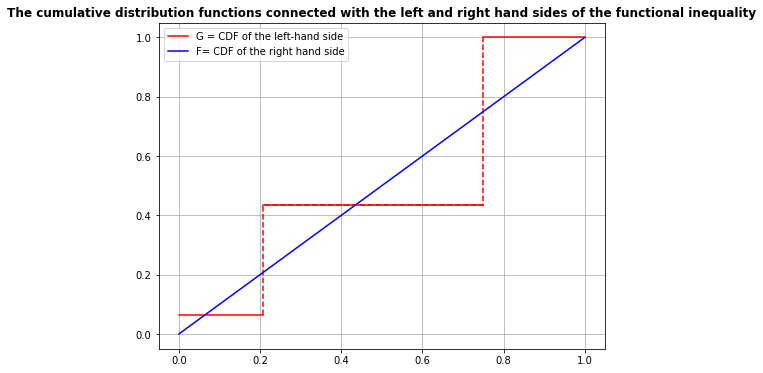

From Step 2, we obtain the number of the crossing points of these functions to be 4.

By Step 3, the functional inequality is satisfied neither by all 2-convex function nor by all 2-concave function.

- The time taken to solve the problem is 0.53 seconds -


In [42]:
general_inequality((3/46)*f(x) + (4107/11086)*f((88/111)*x + (23/111)*y) + (136/241)*f((1/4)*x + (3/4)*y))

**Example 38:** The arithmetic mean of the left and right sides of the Hermite-Hadamard inequality also known as the Bullen inequality. Let $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\frac{1}{4}\left[f(x) + 2f\left(\frac{x+y}{2}\right) + f(y)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$$

By Step 1, every solution of the functional inequality must be a 1-concave functions.



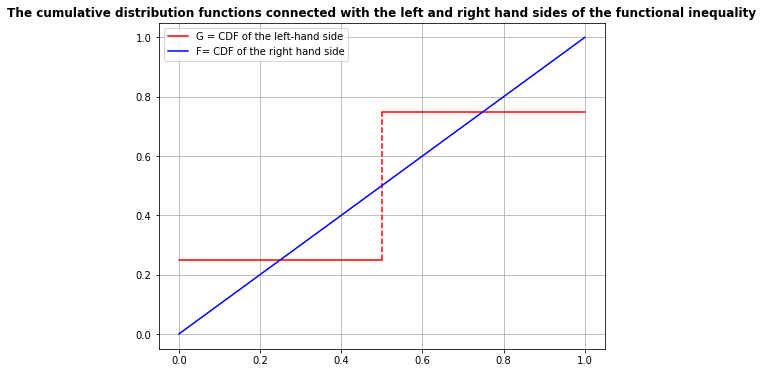

From Step 2, we obtain the number of the crossing points of these functions to be 3.

By Step 3, the functional inequality is satisfied by every 1-concave function f.

- The time taken to solve the problem is 0.38 seconds -


In [43]:
general_inequality((1/4)*(f(x)+ 2*f((x+y)/2) + f(y)))

**Example 39:** The arithmetic mean of the  left and right 2-point Radau quadratures. Suppose that $f:[x,y]\rightarrow \mathbb{R},$
<br>
$$\tfrac{1}{2}\left[\tfrac{1}{4}f(x) + \tfrac{3}{4}f\left(\tfrac{1}{3}x + \tfrac{2}{3}y\right) + \tfrac{3}{4}f\left(\tfrac{2}{3}x + \tfrac{1}{3}y\right) +\tfrac{1}{4}f(y) \right]\leq \frac{1}{y-x}\int_x^y f(t)dt$$

By Step 1, every solution of the functional inequality must be a 3-concave functions.



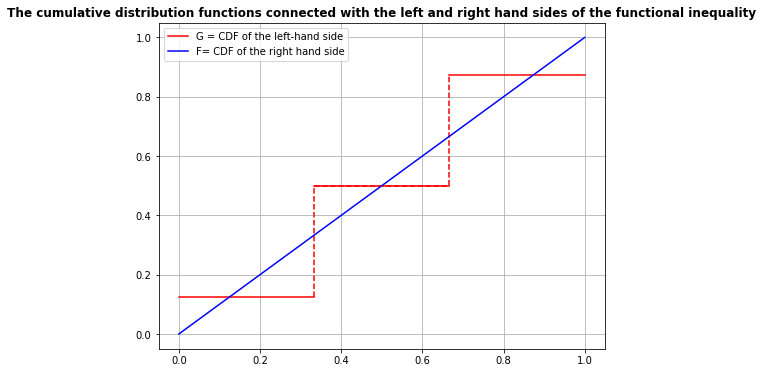

From Step 2, we obtain the number of the crossing points of these functions to be 5.

By Step 3, the functional inequality is satisfied by every 3-concave function f.

- The time taken to solve the problem is 1.22 seconds -


In [44]:
general_inequality((1/2)*((1/4)*f(x) + (3/4)*f((1/3)*x + (2/3)*y)  + (3/4)*f((2/3)*x+ (1/3)*y)+ (1/4)*f(y)))

**Example 40:** The arithmetic mean of 2-point Gauss and 3-point Lobatto (i.e. Simpson) quadratures. Suppose that $f:[x,y]\rightarrow \mathbb{R},$
<br>
<br>
$$\textstyle \frac{1}{2}\left[\frac{1}{2}f\left(\frac{3+\sqrt3}{6}x + \frac{3-\sqrt3}{6}y\right) + \frac{1}{2}f\left(\frac{3-\sqrt3}{6}x + \frac{3+\sqrt3}{6}y\right) + \frac{1}{6}f(x) + \frac{2}{3}f\left(\frac{x+y}{2}\right) + \frac{1}{6}f(y)\right]\leq \frac{1}{y-x}\int_x^y f(t)dt$$

By Step 1, every solution of the functional inequality must be a 3-concave functions.



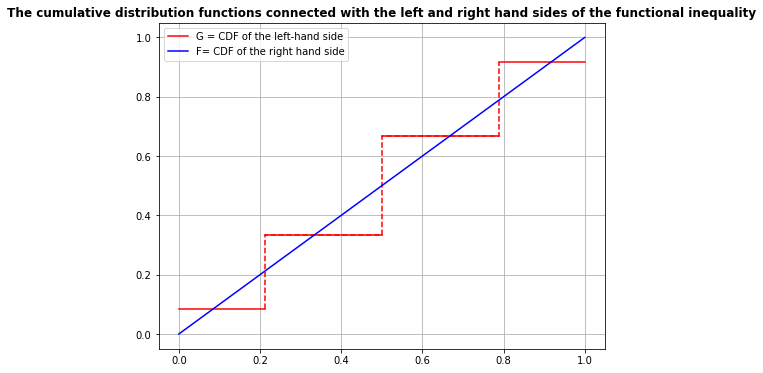

From Step 2, we obtain the number of the crossing points of these functions to be 7.

By Step 3, the functional inequality is satisfied by every 3-concave function f.

- The time taken to solve the problem is 4.26 seconds -


In [45]:
general_inequality((1/2)*((1/2)*(f(((3+sqrt(3))/6)*x + ((3-sqrt(3))/6)*y))+ (1/2)*(f(((3-sqrt(3))/6)*x + ((3+sqrt(3))/6)*y))\
                  +(1/6)*f(x) + (2/3)*f((x+y)*(1/2)) + (1/6)*f(y)))